## LLM  Part 5 :  Self Attention 

**Reference text** 

https://www.manning.com/books/build-a-large-language-model-from-scratch

**Text Corpus** 

The text we will tokenize for LLM training is a short story by Edith Wharton called The Verdict, which has been released into the public domain and is thus permitted to be used for LLM training tasks. The text is available on Wikisource at https://en.wikisource.org/wiki/The_Verdict,

##  Schematic  Three key stages of coding an LLM 








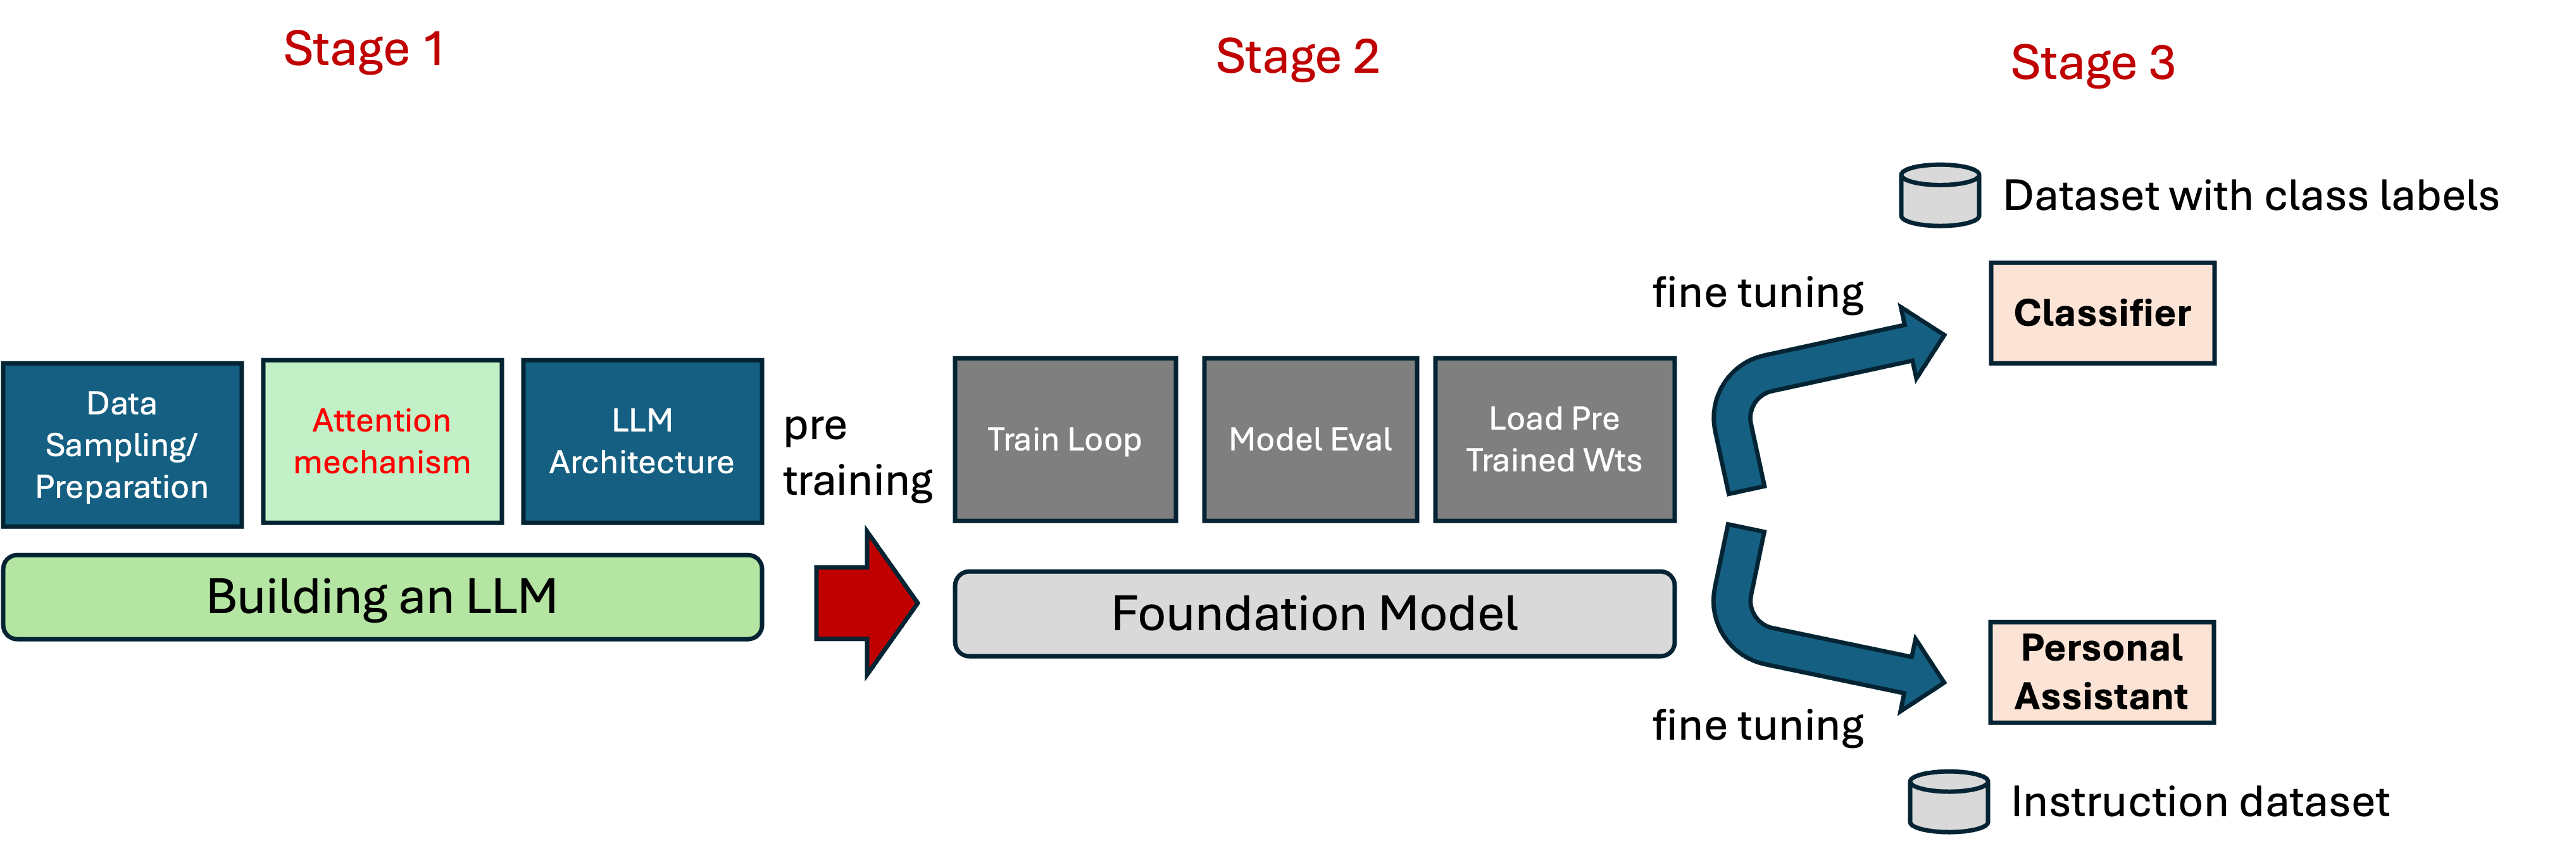

##  Attention Mechanisms

The figure below depicts different attention mechanisms we will code in this series:

- Starting with a simplified version of self-attention before adding the trainable weights. 
- The causal attention mechanism adds a mask to self-attention that allows the LLM to generate one word at a time. 
- Finally, multi-head attention organizes the attention mechanism into multiple heads, allowing the model to capture various aspects of the input data in parallel.


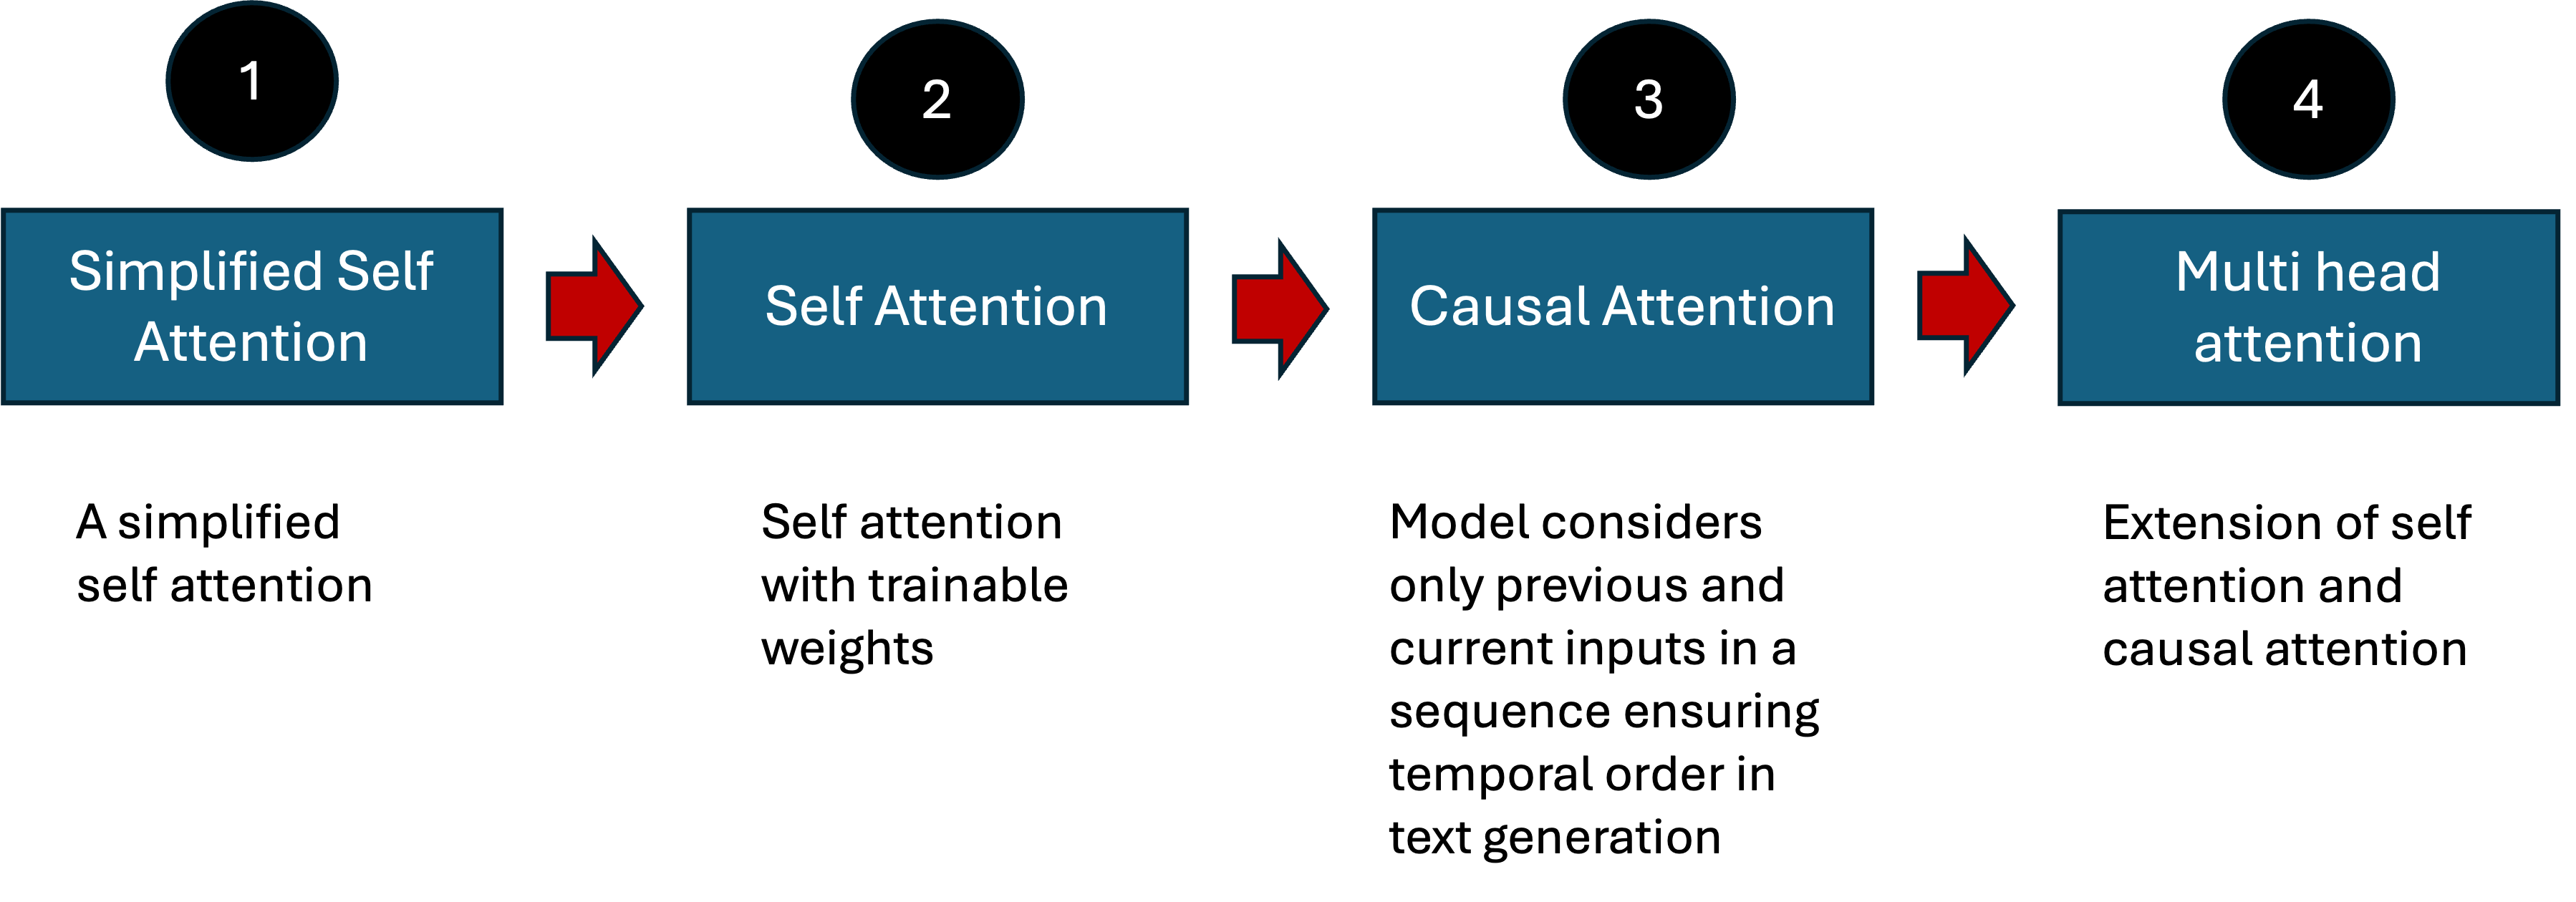

### Challenges in Modelling Long Sequences : Example Language Translation 

- A word by word sequenced translation does not help 
- We need an encoder - decoder kind of architecture where the entire input is read and processed and then the decoder generates the translated text 
- Before the advent of transformers, recurrent neural networks (RNNs) were the most popular encoder-decoder architecture for language translation
- Where RNN did not perform well was longer sentences or sequences 


### Example Schematic of Word by Word Translation  issues vs context to context translation 

We can't simply translate a text word by word due to the grammatical structures in the source and target language.

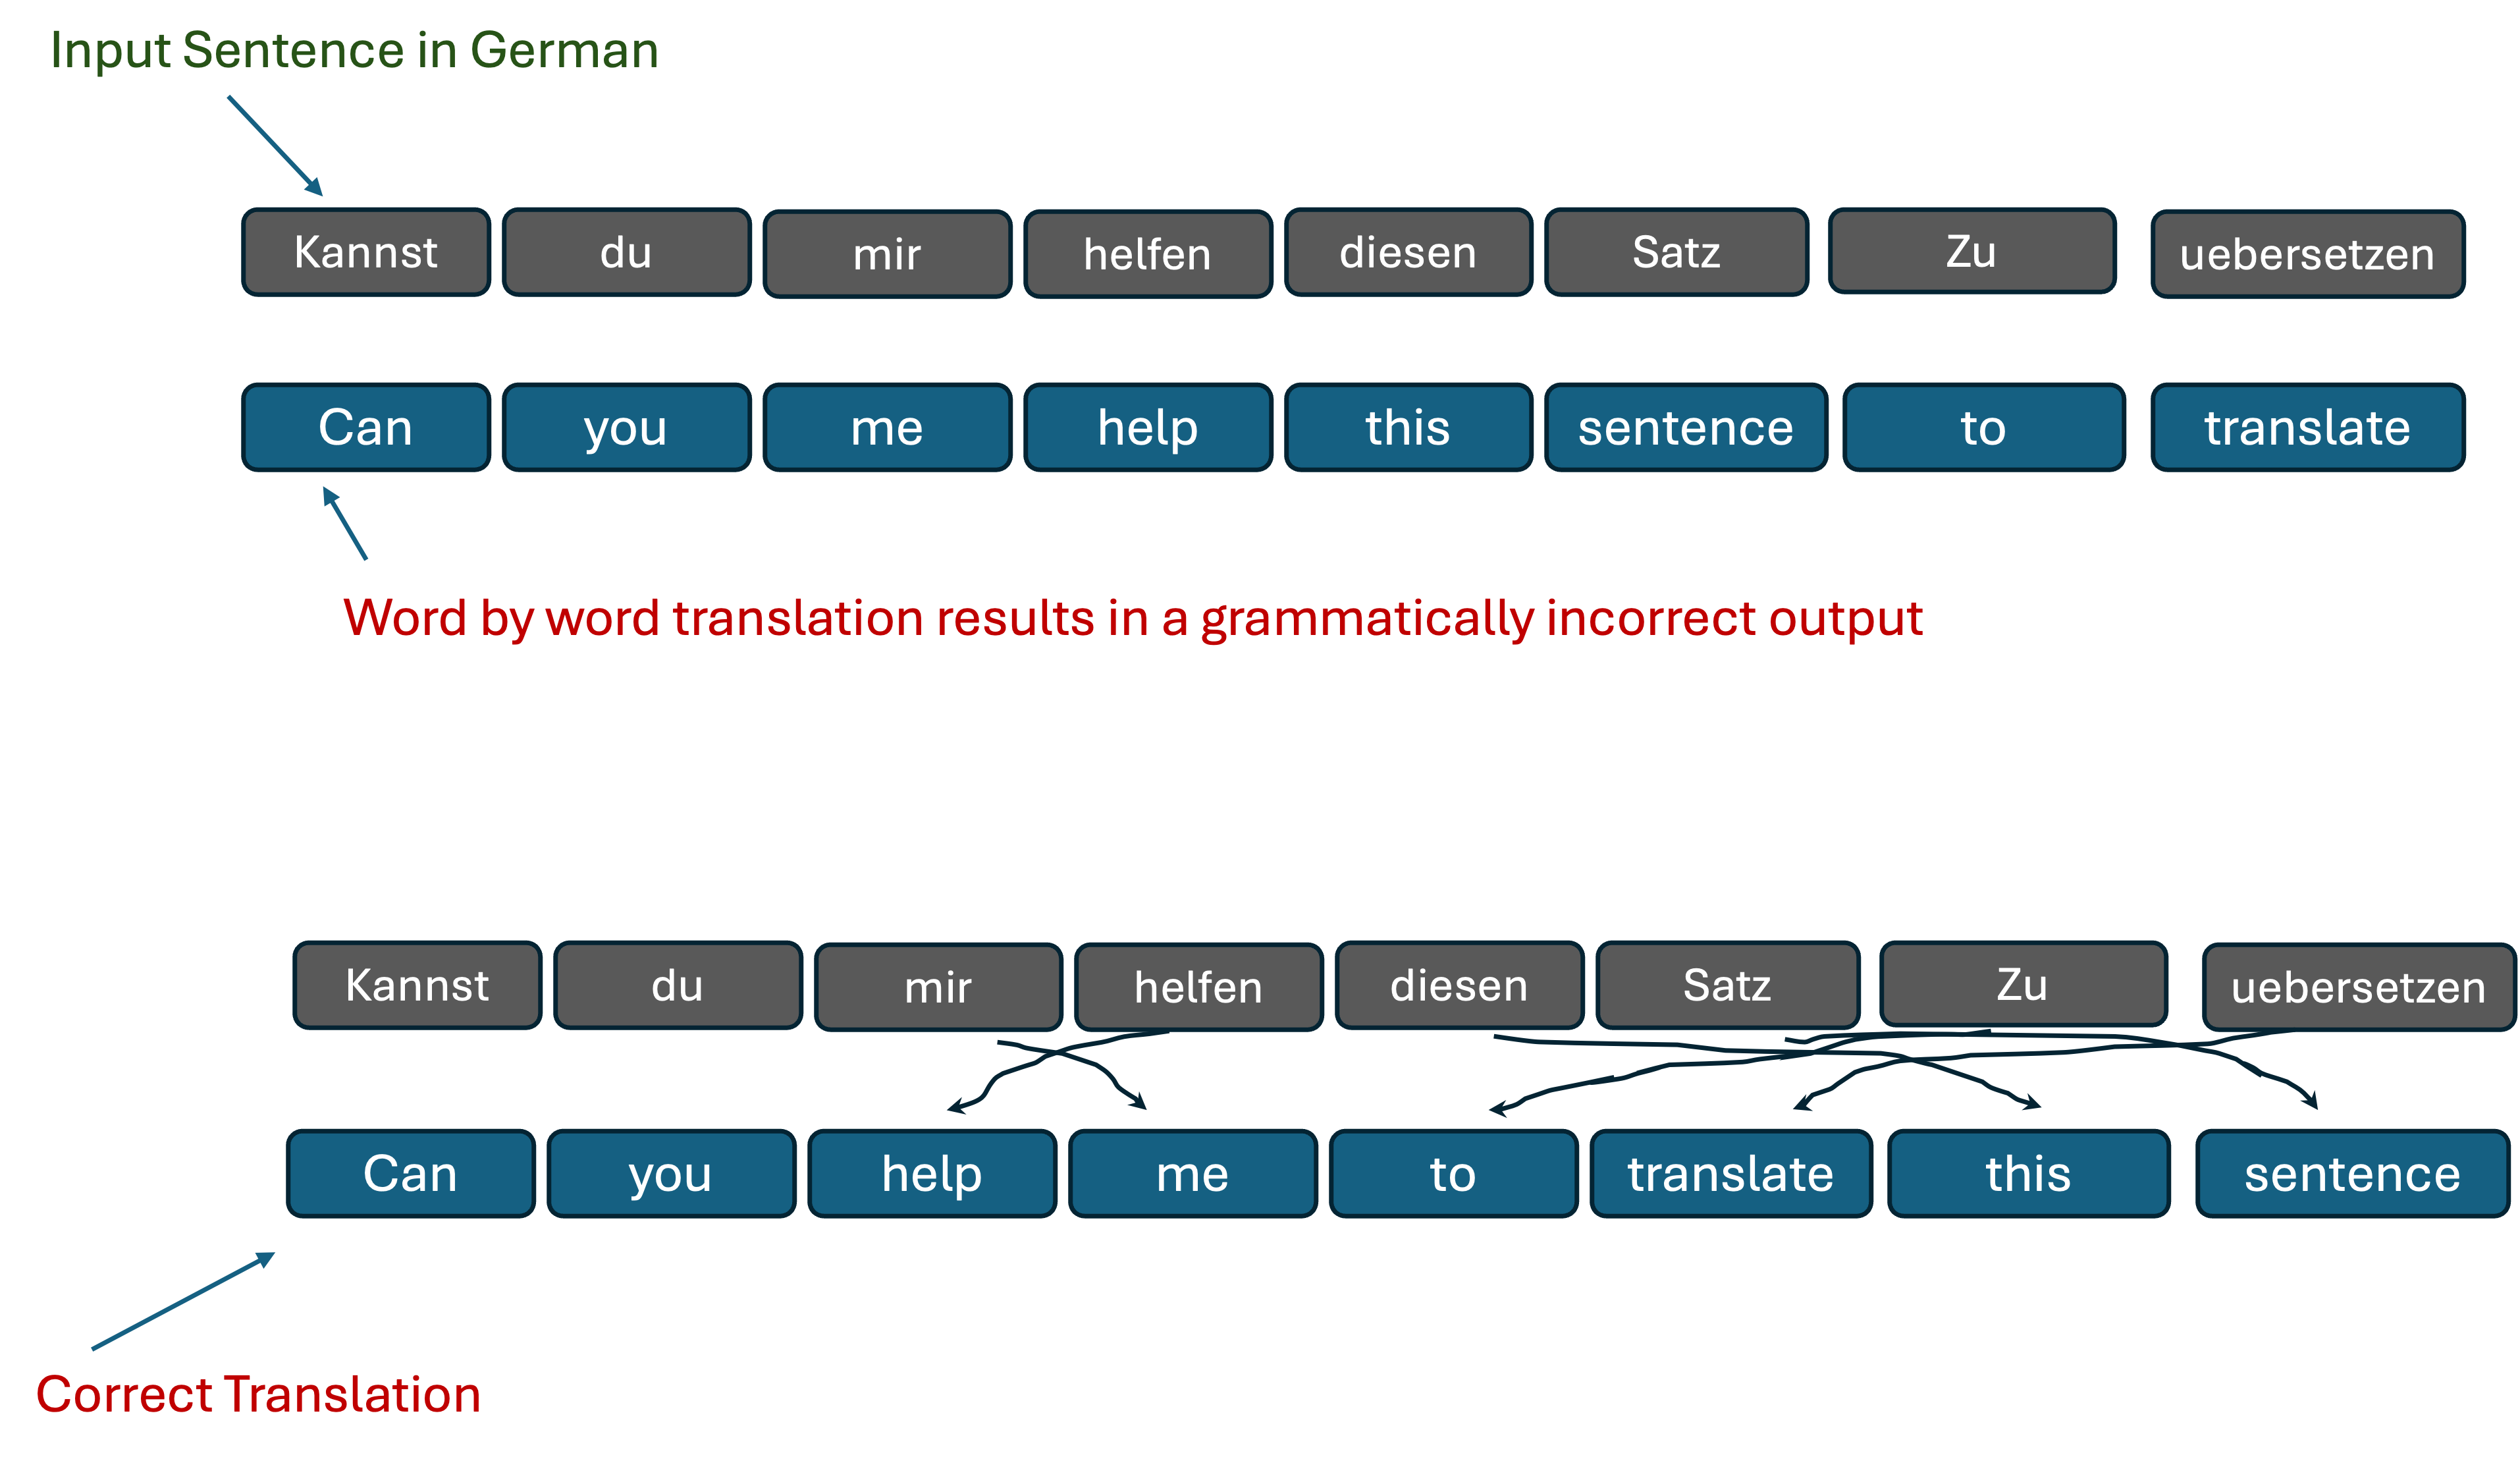

### How to overcome the problem of language translation 

- To address the issue that we cannot translate text word by word.
- It is common to use a deep neural network with two submodules, a so-called encoder and decoder. 
- The job of the encoder is to first read in and process the entire text, and the decoder then produces the translated text.

### Schematic of Encoder - Decoder 

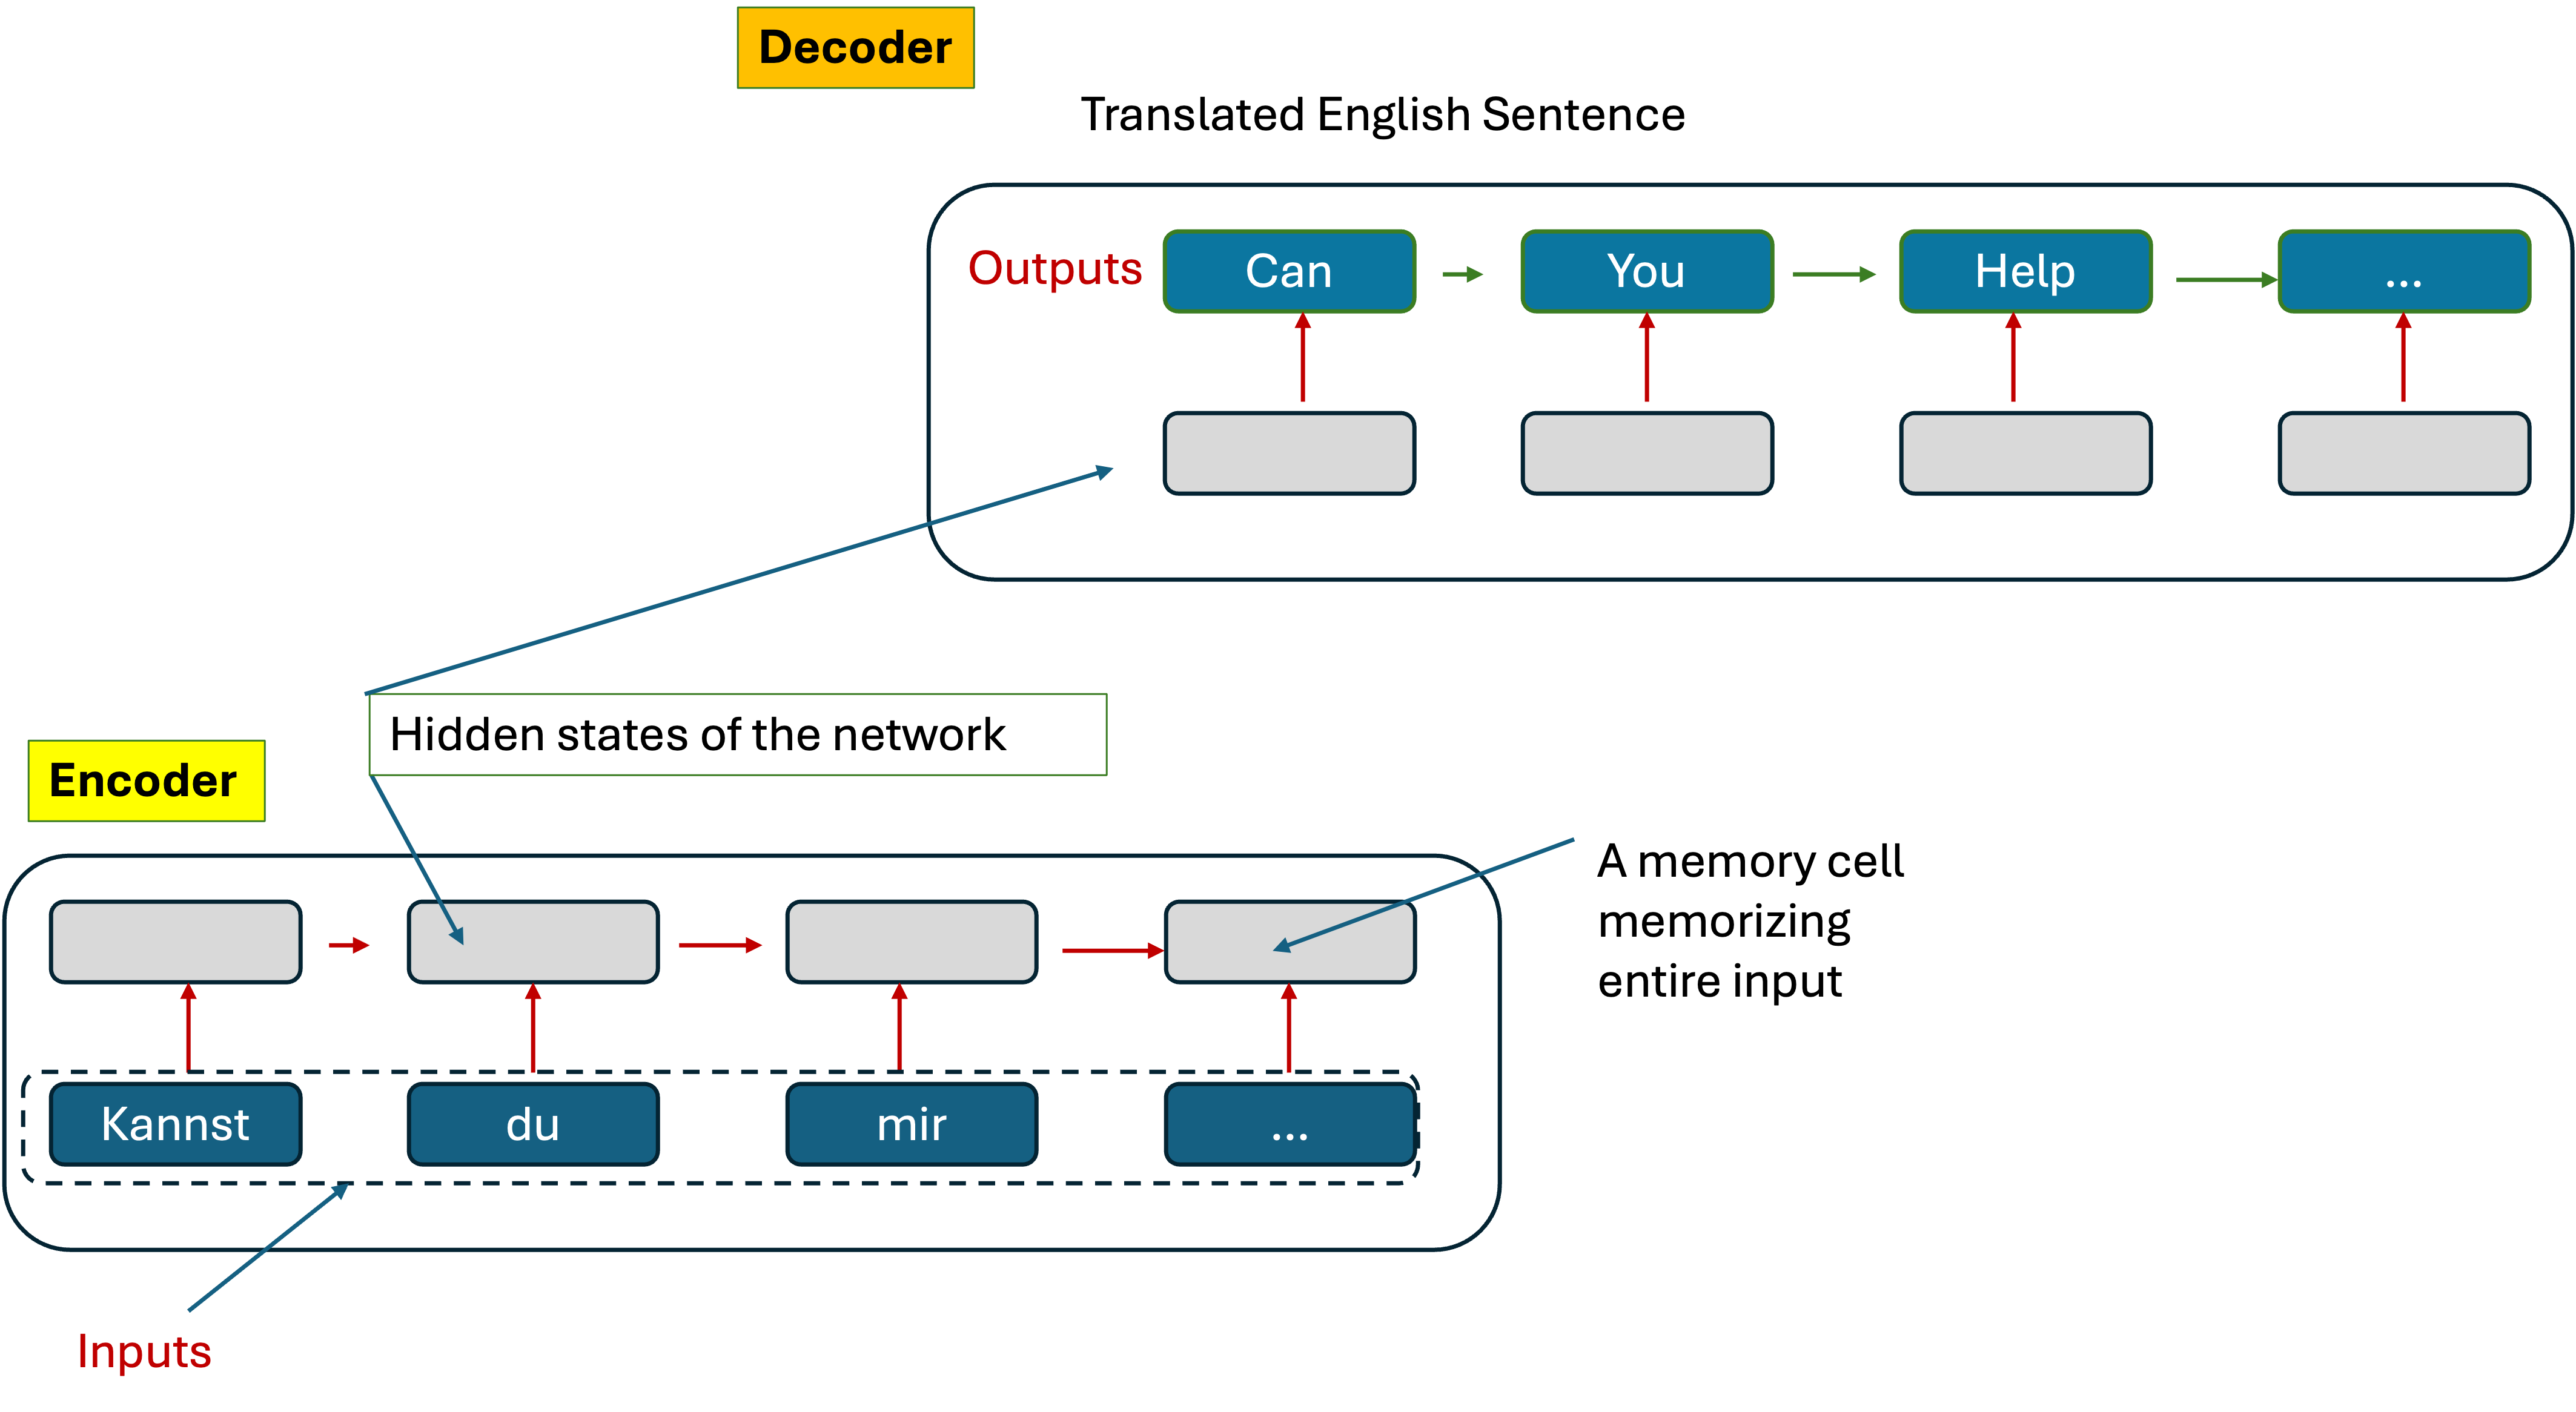

### Key Limitation of RNN's 

- Using RNN the encoder part processes the entire input text into a hidden state (memory cell). The decoder then takes in this hidden state to produce the output. 

- The RNN can't directly access earlier hidden states from the encoder during the decoding phase. 

- Consequently, it relies solely on the current hidden state, which encapsulates all relevant information. This can lead to a loss of context, especially in complex sentences where dependencies might span long distances.

- This shortcoming lead to the development of Attention mechanisms 


### Capturing Data Dependencies with Attention Mechanism 


**Background Note**

- Before transformer LLMs, it was common to use RNNs for language modeling tasks such as language translation, as mentioned previously

- RNNs work fine for translating short sentences but don't work well for longer texts as they don't have direct access to previous words in the input.

- To overcome the short comings of RNN , researchers developed the so-called Bahdanau attention mechanism for RNNs in 2014 which modifies the encoder-decoder RNN such that the decoder can selectively access different parts of the input sequence at each decoding step. as shown below 



### Schematic to  show the general idea behind attention 

**Key idea of Attention**

This means that some input tokens are more important than others for generating a given output token. The importance is determined by the so-called attention weights. Refer to the below figure.


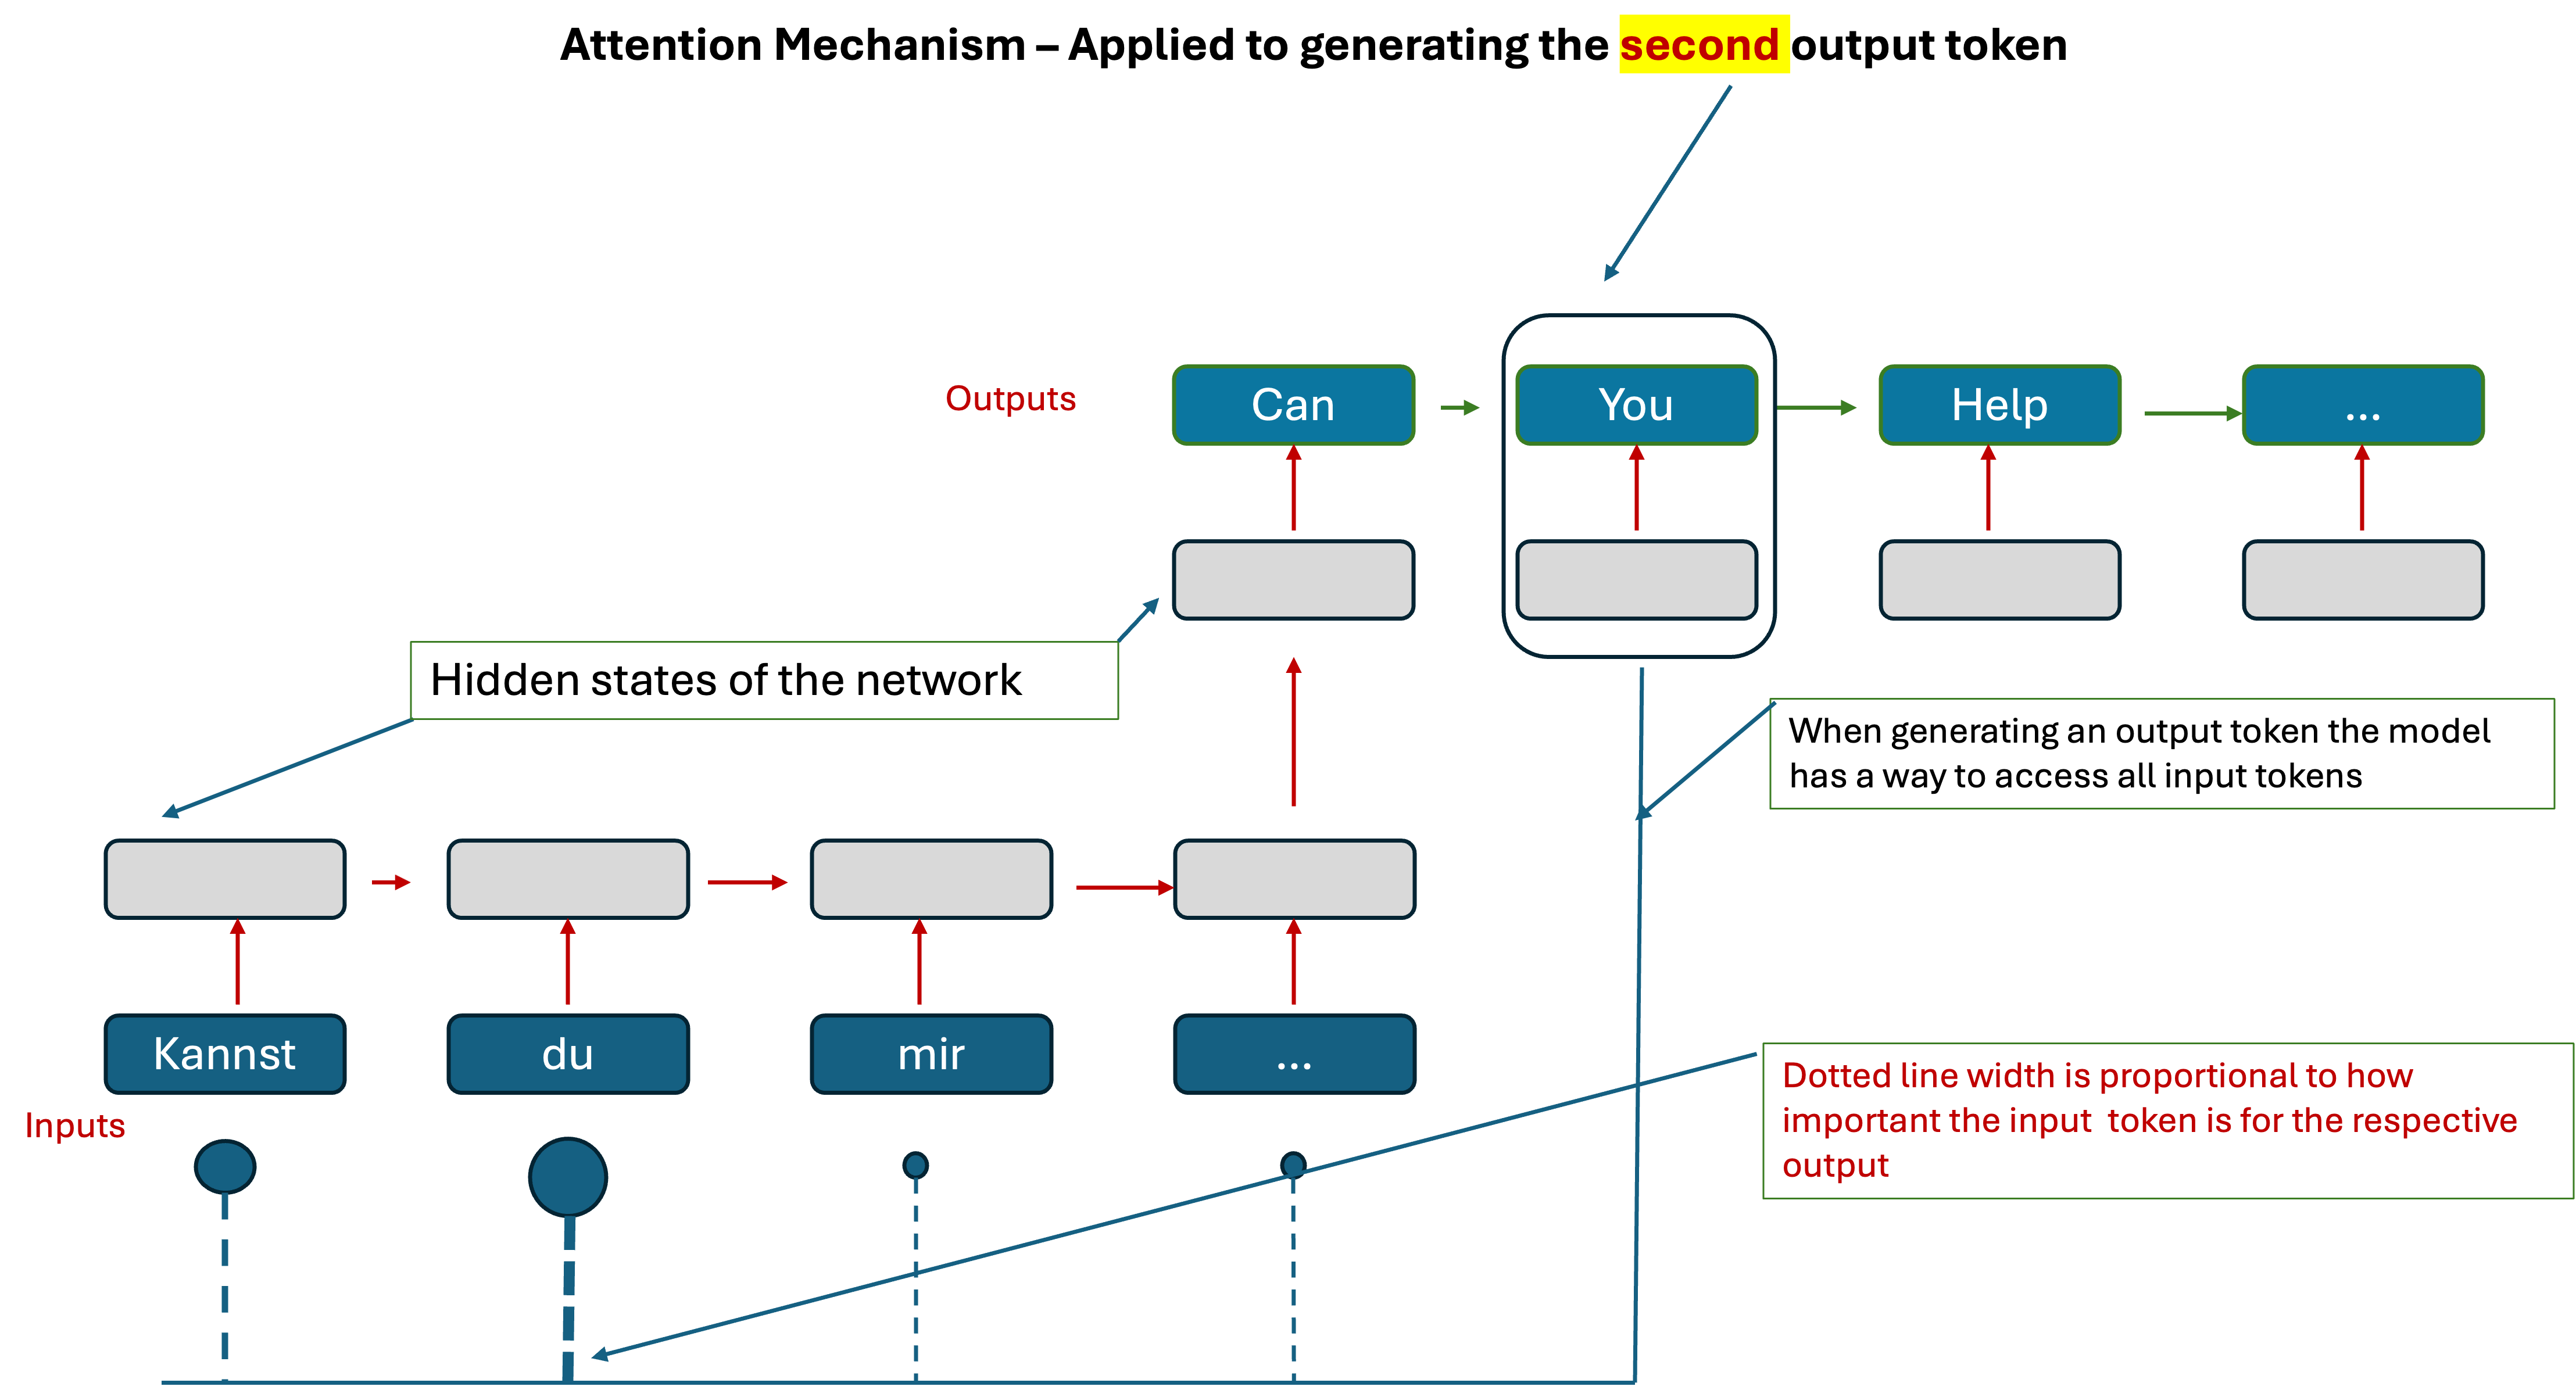





### Concept of Self Attention 

Self-attention is a mechanism that allows each position in the input sequence to attend to all positions in the same sequence when computing the representation of a sequence. 

In self-attention, the "self" refers to the mechanism's ability to compute attention weights by relating different positions within a single input sequence.

It assesses and learns the relationships and dependencies between various parts of the input itself, such as words in a sentence or pixels in an image.

This is in contrast to traditional attention mechanisms, where the focus is on the relationships between elements of two different sequences, such as in sequence-to-sequence models where the attention might be between an input sequence and an output sequence ( As shown above)

### Concept Note: Self attention mechanism 


The goal of self-attention is to compute a context vector, for each input element, that combines information from all other input elements. 

**Refer figure below**

- As in the example depicted in  figure, we compute the context vector z(2).

- The importance or contribution of each input element for computing z(2) is determined by the attention weights α_21 to α_2T. 

- When computing z(2), the attention weights are calculated with respect to input element x(2) and all other inputs.

#### Note 

**The numbers in this figure are truncated to one
digit after the decimal point to reduce visual clutter; similarly, other figures may also contain truncated values**



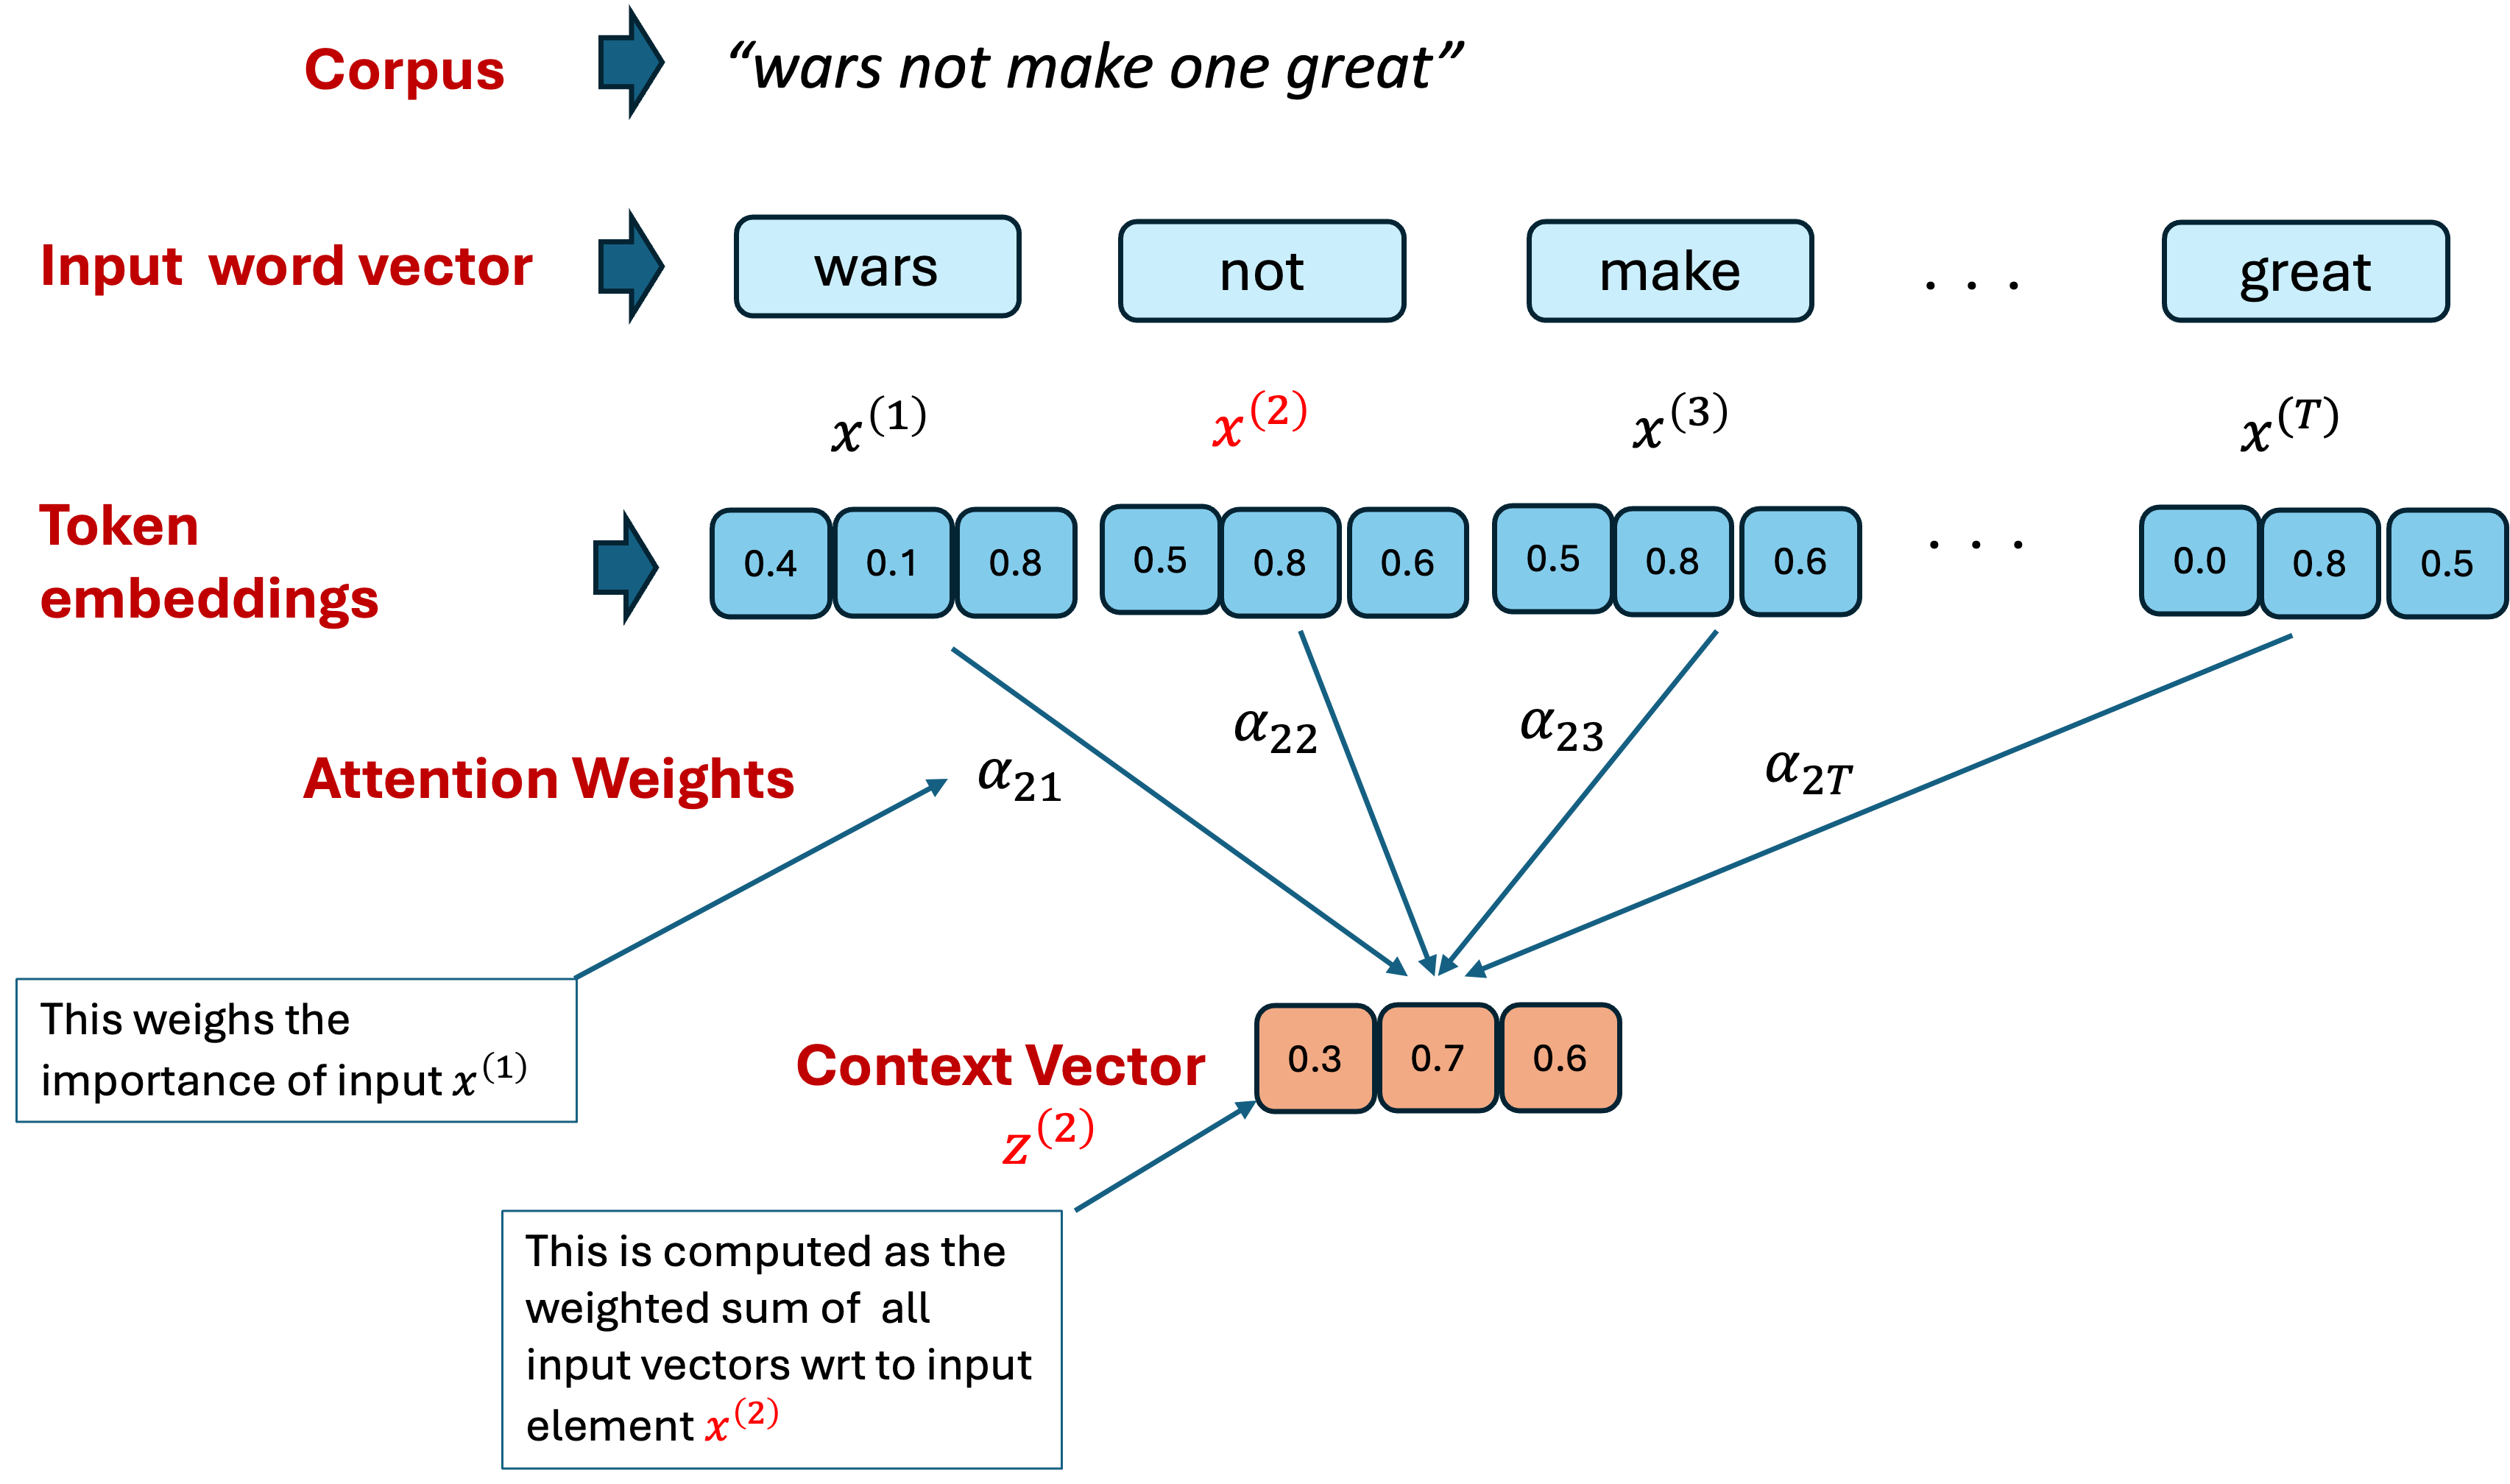

## Implementing a Simple Self Attention mechanism  

####  Reference : Ch 3 of  Reference text mentioned  at the start of this notebook

### STEP 1: Define the word embeddings 

**Notes** 

We hard define the below embeddings for illustration purpose only


In [1]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # wars     (x^1)
   [0.55, 0.87, 0.66], # not      (x^2)
   [0.57, 0.85, 0.64], # make     (x^3)
   [0.22, 0.58, 0.33], # one      (x^4)
   [0.02, 0.81, 0.52]] # great    (x^5)
)



/Users/anishroychowdhury/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### STEP 2: compute unnormalized attention scores $\omega$


- Suppose we use the second input token as the query, that is, $q^{(2)} = x^{(2)}$, we compute the unnormalized attention scores via dot products:
    - $\omega_{21} = x^{(1)} q^{(2)\top}$
    - $\omega_{22} = x^{(2)} q^{(2)\top}$
    - $\omega_{23} = x^{(3)} q^{(2)\top}$
    - ...
    - $\omega_{2T} = x^{(T)} q^{(2)\top}$
- Above, $\omega$ is the Greek letter "omega" used to symbolize the unnormalized attention scores
    - The subscript "21" in $\omega_{21}$ means that input sequence element 2 was used as a query against input sequence element 1
    
    
#### Notes 
- In the case of the tensor shown above, each row represents a word, and each column represents an embedding dimension)

- The primary objective of this section is to demonstrate how the context vector $z^{(2)}$
  is calculated using the second input sequence, $x^{(2)}$, as a query

- The figure depicts the initial step in this process, which involves calculating the attention scores ω between $x^{(2)}$
  and all other input elements through a dot product operation
  
- We use input sequence element 2, $x^{(2)}$, as an example to compute context vector $z^{(2)}$; 
  
- In this  step we compute the unnormalized attention scores by computing the dot product between the query $x^{(2)}$ and all other input tokens

In [2]:
# define query vector 
query = inputs[1]  # 2nd input token is the query

# create an empty tensor for the attention scores wrt to the query (2nd token)
attn_scores_2 = torch.empty(inputs.shape[0])


### The below loop performs the following

# Traverse all the word embeddings of the input text
# compute dot products between the 2nd token embedding
# save the scores in the empty tensor created above 

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product 

# print attention scores 
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 1.0589])


### STEP 3 - Compute Attention Weights from Attention Scores after Normalizing 

- Normalize the unnormalized attention scores ("omegas", $\omega$) so that they sum up to 1
- For this we will use soft max function 

### STEP 3a : A naive implementation of Softmax function 

The function below defines a naive softmax function 

In [3]:
import torch


def softmax_naive(x: torch.tensor) -> torch.tensor:
    """
    Computes the softmax of a tensor along a specified dimension.

    The softmax function is defined as:
    softmax(x) = exp(x) / sum(exp(x))

    This implementation is naive and assumes input `x` is a tensor. The
    computation is performed along the specified dimension.

    Parameters:
    -----------
    x : torch.Tensor
        The input tensor for which the softmax is to be computed.

    Returns:
    --------
    torch.Tensor
        A tensor containing the softmax of the input tensor `x`.

    Example:
    --------
    >>> x = torch.tensor([1.0, 2.0, 3.0])
    >>> softmax_naive(x)
    tensor([0.0900, 0.2447, 0.6652])

    Notes:
    ------
    - The input tensor can be of any shape.
    - The softmax is computed along dimension 0 by default.
    """

    return torch.exp(x) / torch.exp(x).sum(dim=0)


### STEP 3b -  Normalize the scores to get attention weights 

In [4]:
# pass the attention scores for query vector to softmax and compute attention weights for input token 2 
attn_weights_2_naive = softmax_naive(attn_scores_2)

# check 
print("Attention weights:", attn_weights_2_naive)

# check that the sum is = 1 
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1561, 0.2680, 0.2628, 0.1397, 0.1733])
Sum: tensor(1.)


### Notes

- The naive implementation above can suffer from numerical instability issues for large or small input values due to overflow and underflow issues

- Hence, in practice, it's recommended to use the PyTorch implementation of softmax instead, which has been highly optimized for performance:

### STEP 3c -  Normalize the scores to get attention weights using pytorchs softmax version 

In [5]:
# pass the attention scores for query vector to softmax and compute attention weights for input token 2 
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

# check 
print("Attention weights:", attn_weights_2)

# check that the sum is = 1 
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1561, 0.2680, 0.2628, 0.1397, 0.1733])
Sum: tensor(1.)


 ### STEP 4 - compute the context vector $z^{(2)}$ 
 
 - For this we  multiply the embedded input tokens, $x^{(i)}$ with the attention weights and sum the resulting vector

In [6]:
# select the query vector 
query = inputs[1] # 2nd input token is the query

# Initialize context vector 
context_vec_2 = torch.zeros(query.shape)

# sum the products of attention weights and 
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

# check 
print(context_vec_2)

tensor([0.3986, 0.7014, 0.6203])


### A schematic depiction of all the steps mentioned above is shown in the figure below 


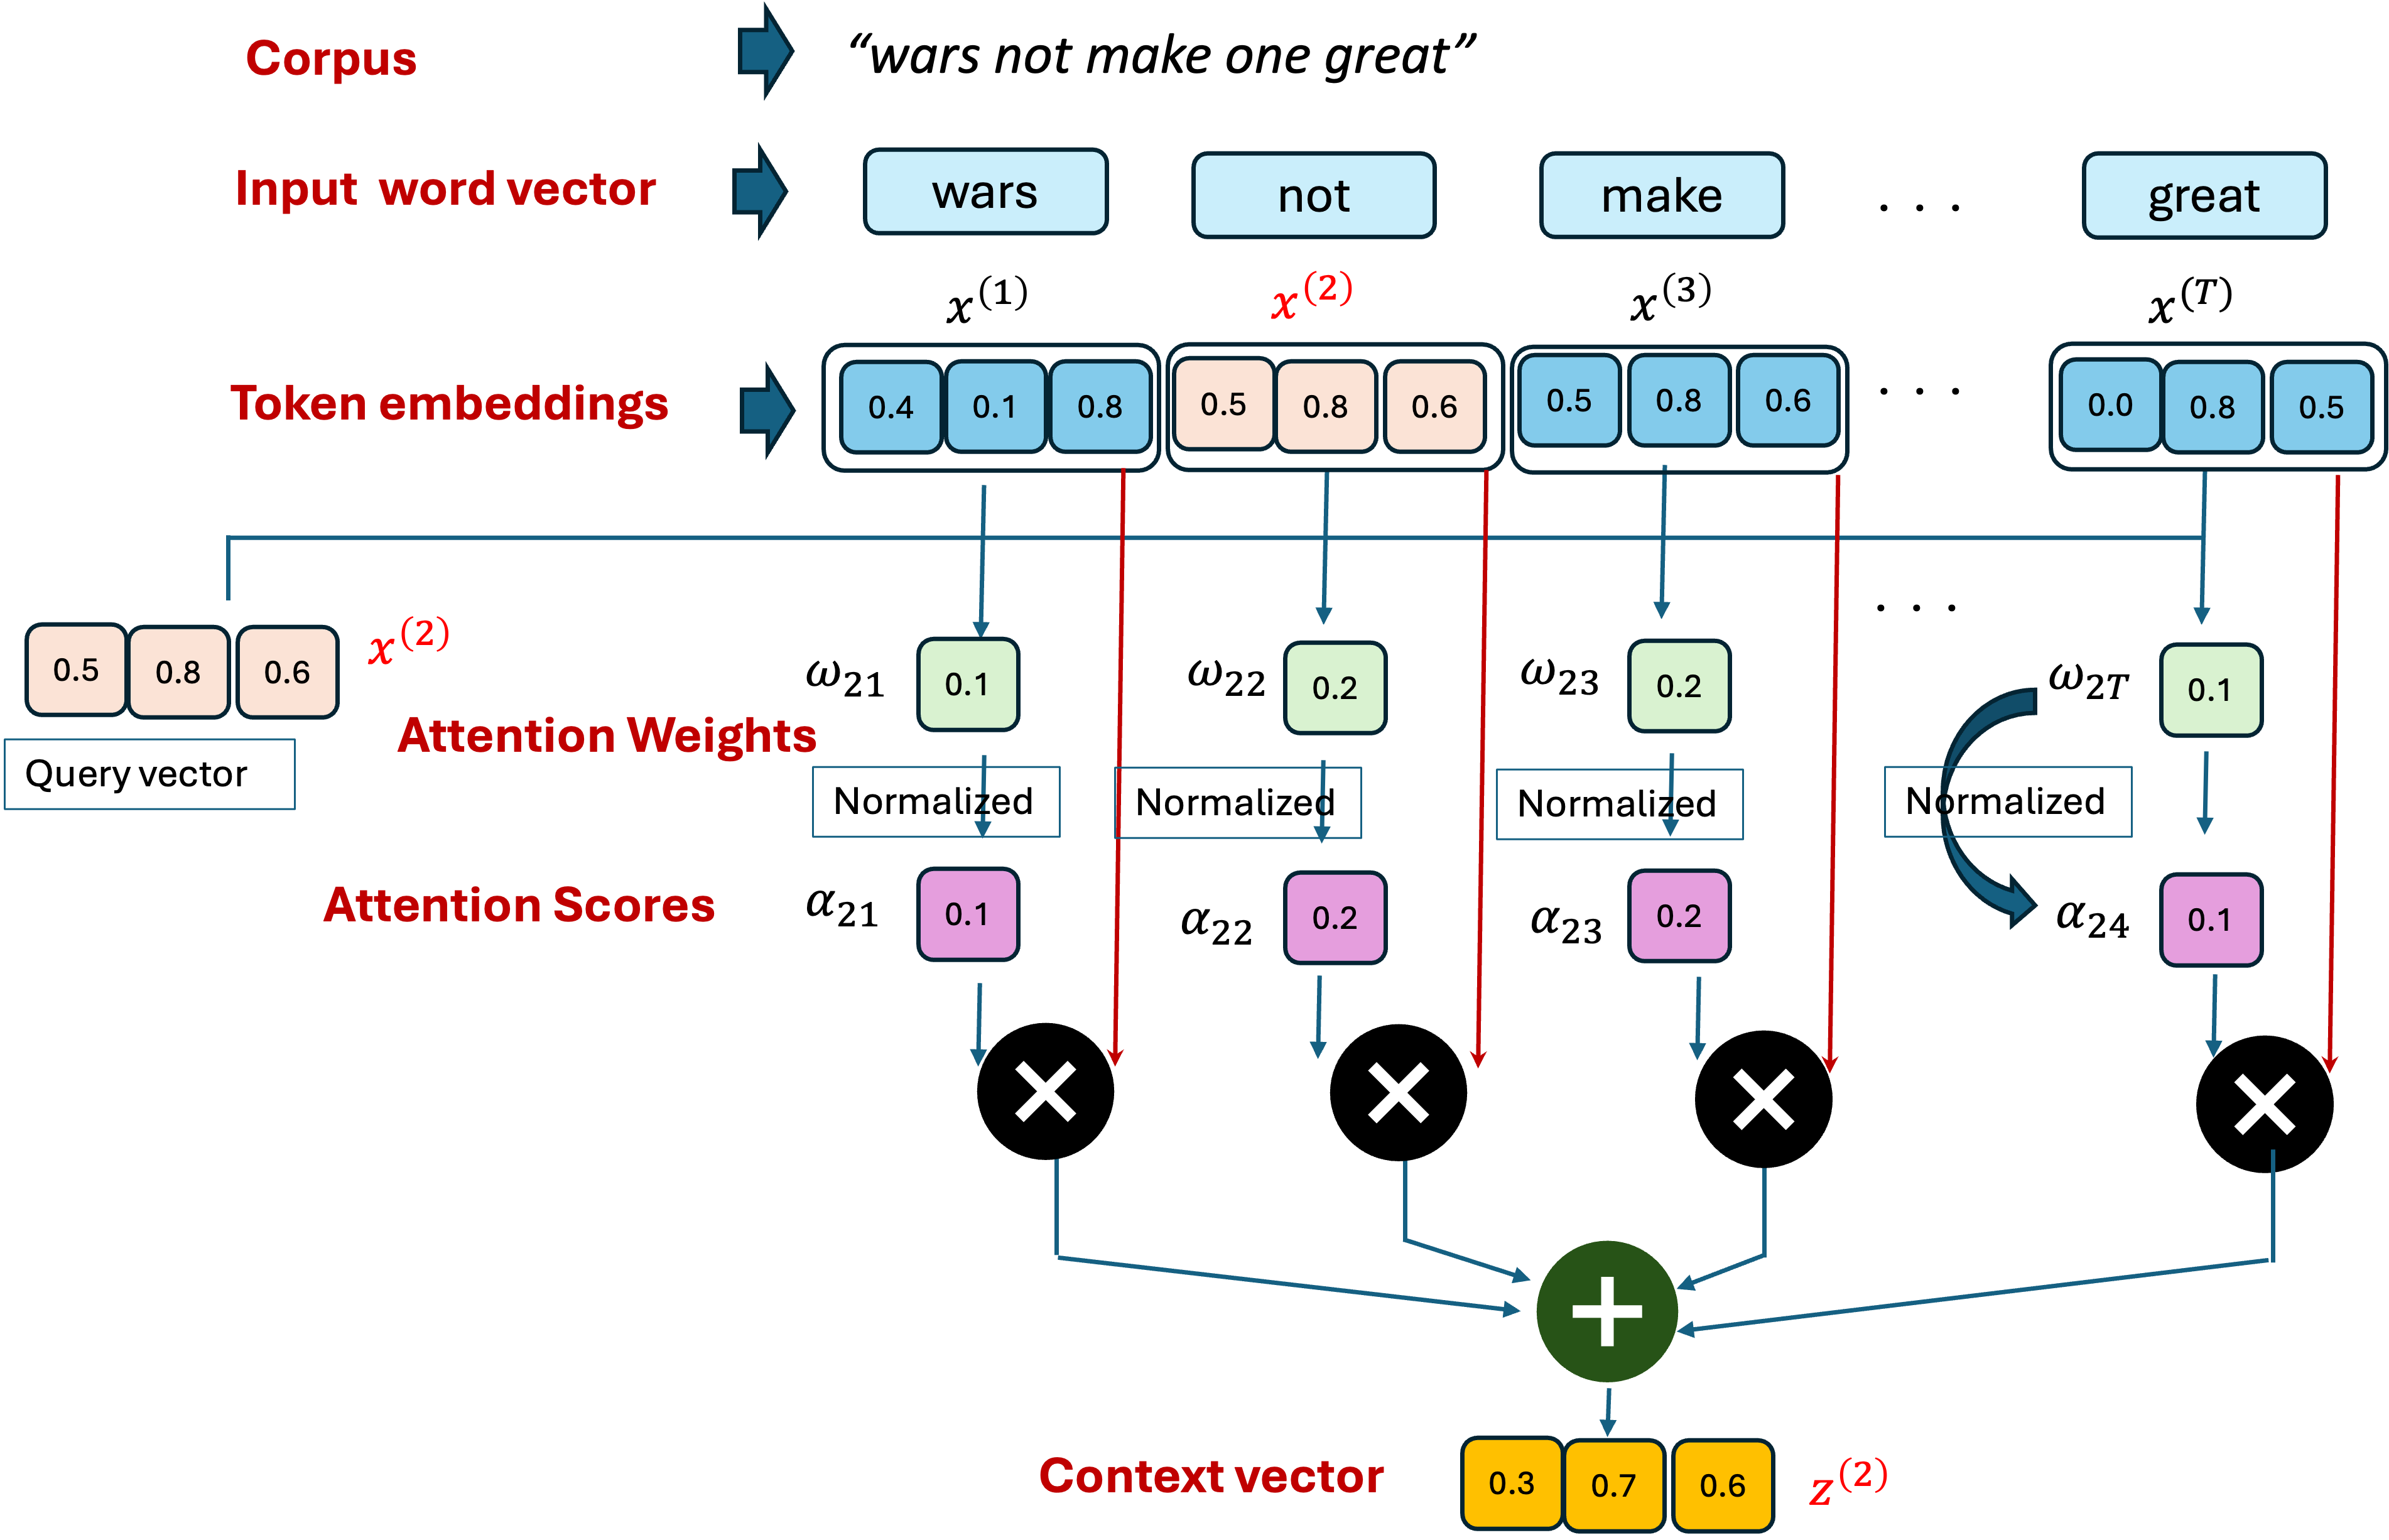


### STEP 5 - Computing Attention weights for all input tokens 

- Above, we computed the attention weights and context vector for input 2 
- Next, we are generalizing this computation to compute all attention weights and context vectors

### STEP 5 a  : Compute pairwise unnormalized score matrix 

In [7]:
# get the dimension value for the pairwise square score matrix 
dim = inputs.shape[0]

# define empty matrix 
attn_scores = torch.empty(dim, dim)


# iterate through the input embedding vectors in a pair wise nested sense 
# compute and store the pairwise dot products which are the attention scores 

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
        
# check 
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.5929],
        [0.9544, 1.4950, 1.4754, 0.8434, 1.0589],
        [0.9422, 1.4754, 1.4570, 0.8296, 1.0327],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.6458],
        [0.5929, 1.0589, 1.0327, 0.6458, 0.9269]])


In [8]:
## Achieve the same result via matrix multiplication 
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.5929],
        [0.9544, 1.4950, 1.4754, 0.8434, 1.0589],
        [0.9422, 1.4754, 1.4570, 0.8296, 1.0327],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.6458],
        [0.5929, 1.0589, 1.0327, 0.6458, 0.9269]])


### STEP 5 b  Normalise Attention scores to arrive at attention weights 

- Here we apply softmax at a row level 


In [9]:
# apply softmax at row level 
attn_weights = torch.softmax(attn_scores, dim=-1)

# check and display 
print(attn_weights)

tensor([[0.2405, 0.2299, 0.2271, 0.1424, 0.1601],
        [0.1561, 0.2680, 0.2628, 0.1397, 0.1733],
        [0.1571, 0.2677, 0.2629, 0.1404, 0.1720],
        [0.1646, 0.2379, 0.2346, 0.1677, 0.1952],
        [0.1516, 0.2416, 0.2353, 0.1598, 0.2117]])


### STEP 5 c ; Verification that row sums are = 1 

In [10]:
print("All row sums:", attn_weights.sum(dim=-1))

All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


### STEP 5 d : Compute All context vectors

Here we multipliy the ith embedding vector with the ith row of the Attention weights to get the ith context vector 

[Attention Weights 6x6] multiplies [input embeddings 6 X 3]  to give 6 context vectors of size 3 each 

In [11]:
# matrix multiply 
all_context_vecs = attn_weights @ inputs

# check 
print(all_context_vecs)

tensor([[0.3938, 0.6414, 0.6414],
        [0.3986, 0.7014, 0.6203],
        [0.3989, 0.7006, 0.6205],
        [0.3761, 0.6864, 0.6105],
        [0.3716, 0.6971, 0.6078]])


## End of Notebook